In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [18]:

# Load the Financial Sentiment Analysis dataset from Kaggle
# https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis

# Load the dataset (update with the correct path to the CSV file)
financial_df = pd.read_csv('./data/data.csv')


## Basic dataset exploration

In [19]:
# Inspect the first few rows
financial_df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


C:\Users\pk\AppData\Local\Temp\ipykernel_17100\121948745.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


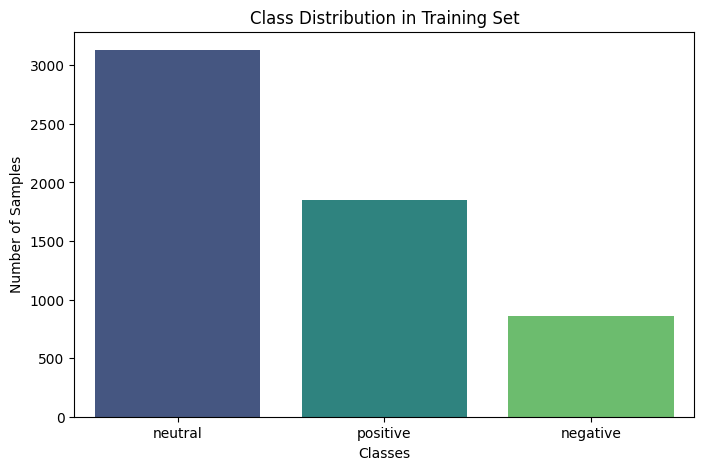

Class distribution in training set:
Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


In [20]:
# Lets check distribution of different sentiments

import matplotlib.pyplot as plt
import seaborn as sns

class_counts = financial_df['Sentiment'].value_counts()

# Create a bar plot to visualize the distribution of classes
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Set the labels and title
plt.title('Class Distribution in Training Set')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')

# Show the plot
plt.show()

# If you want to see the exact counts as well
print("Class distribution in training set:")
print(class_counts)

There imbalance in dataset. OPTIONALLY, you can tackle this later and compare the results. 

In [21]:

# Preprocess the dataset: filter positive and negative sentiments
financial_df = financial_df[financial_df['Sentiment'].isin(['positive', 'neutral', 'negative'])]

# Define the features (financial phrases) and labels (sentiment)
text = financial_df['Sentence'].values
labels = financial_df['Sentiment'].apply(lambda x: 2 if x == 'positive' else (1 if x == 'neutral' else 0)).values


In [22]:

# Use TfidfVectorizer to convert text data (financial phrases) into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit the vectorizer on the financial phrases and transform them into TF-IDF vectors
X_tfidf = tfidf_vectorizer.fit_transform(text)


In [23]:
# Convert the sparse matrix to a DataFrame (Optional)
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF matrix
print(X_tfidf_df.head())

    00  000   01  012   02  029   03   04  045  047  ...  ñkel  ñki   ñl  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0  0.0   

   ñmeri  ñnekoski  ñnen  ñnge  ñnnen  ñrtsil  ñrvi  
0    0.0       0.0   0.0   0.0    0.0     0.0   0.0  
1    0.0       0.0   0.0   0.0    0.0     0.0   0.0  
2    0.0       0.0   0.0   0.0    0.0     0.0   0.0  
3    0.0       0.0   0.0   0.0    0.0     0.0   0.0  
4    0.0       0.0   0.0   0.0    0.0     0.0   0.0  

[5 rows x 5000 columns]


In [24]:

# Split the data for training and validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)


In [25]:
# Initialize logistic regression model
clf = LogisticRegression(max_iter=1000)

# Train the model
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
# Evaluate the model
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")


Validation Accuracy: 0.6997


In [27]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_val)
rf_accuracy = accuracy_score(y_val, y_pred_rf)

print(f"Random Forest Validation Accuracy: {rf_accuracy:.4f}")

Random Forest Validation Accuracy: 0.6698


In [28]:
# XGBoost Classifier
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_val)
xgb_accuracy = accuracy_score(y_val, y_pred_xgb)

print(f"XGBoost Validation Accuracy: {xgb_accuracy:.4f}")

c:\Users\pk\Anaconda3\envs\SDS24\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Validation Accuracy: 0.6766


In [29]:
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Validation Accuracy': [accuracy, rf_accuracy, xgb_accuracy]
})

results_df

,Model,Validation Accuracy
0,Logistic Regression,0.699743
1,Random Forest,0.669803
2,XGBoost,0.676647


In [30]:
# Analyze predictions by class using a classification report for XG Boost
from sklearn.metrics import classification_report

# Generate and display a classification report for XGBoost predictions
class_report = classification_report(y_val, y_pred_xgb, target_names=['negative', 'neutral', 'positive'])
print(class_report)


              precision    recall  f1-score   support

    negative       0.37      0.21      0.26       175
     neutral       0.68      0.86      0.76       622
    positive       0.78      0.59      0.67       372

    accuracy                           0.68      1169
   macro avg       0.61      0.55      0.56      1169
weighted avg       0.66      0.68      0.66      1169



The results show that the model is very poor at predicting the negative sentiment. This might be because of the imbalance in dataset. 